In [48]:
import pickle

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
#from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [3]:
mri= pd.read_csv("oasis_longitudinal.csv")

In [4]:
Pre_Cleaned = pd.DataFrame(mri)
Pre_Cleaned

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [5]:
#Missing value check
print(Pre_Cleaned.isnull().any())

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES            True
MMSE           True
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool


In [6]:
#Filling gaps using mode
Pre_Cleaned['SES'].fillna(2,inplace = True)

In [7]:
#Filling gaps using mode
Pre_Cleaned['MMSE'].fillna(30,inplace = True)

In [8]:
Pre_Cleaned = Pre_Cleaned.drop(Pre_Cleaned[Pre_Cleaned['Group'] == 'Converted'].index)

In [9]:
Pre_Cleaned = Pre_Cleaned.drop('Hand', axis = 1)

In [10]:
print(Pre_Cleaned.isnull().any())

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Age           False
EDUC          False
SES           False
MMSE          False
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool


In [11]:
Pre_Cleaned

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [12]:
#Transfer character to numeric
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns

    def fit(self,X,y=None):
        return self

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [13]:
Pre_Cleaned[['Group','M/F']]=Pre_Cleaned[['Group','M/F']].apply(LabelEncoder().fit_transform)

In [14]:
Pre_Cleaned

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,1,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,1,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,0,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,0,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,0,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,0,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,0,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,1,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,1,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


C:\Users\Varun\AppData\Local\Temp\ipykernel_10248\3954702725.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Pre_Cleaned.corr()[['Group']].sort_values(by='Group', ascending=False)
C:\Users\Varun\AppData\Local\Temp\ipykernel_10248\3954702725.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(Pre_Cleaned.corr()[['Group']].sort_values(by='Group', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


Text(0.5, 1.0, 'Features Correlating with Group')


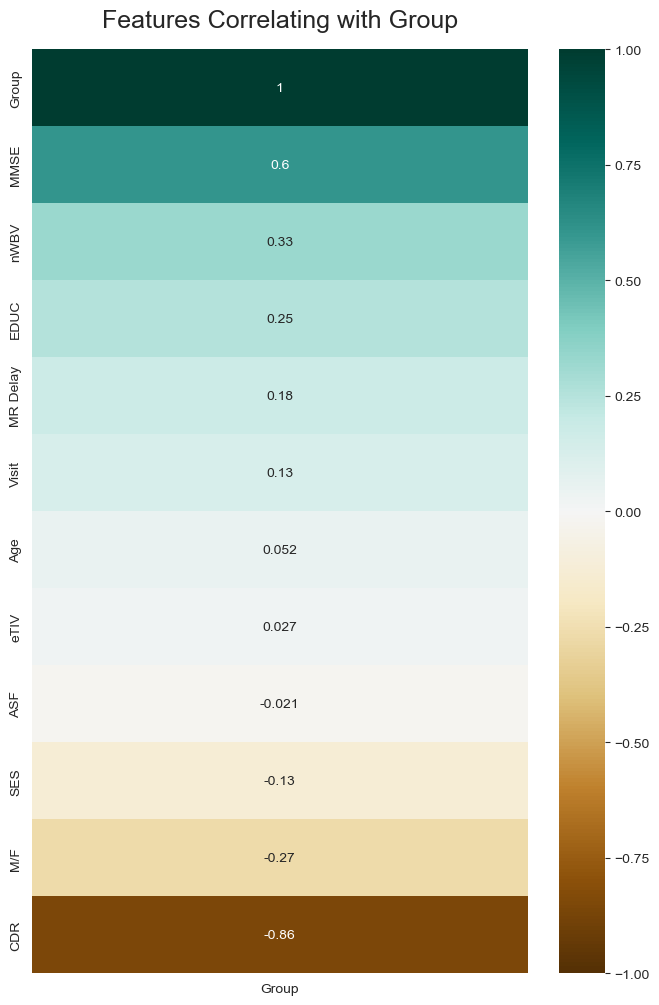

In [15]:
Pre_Cleaned.corr()[['Group']].sort_values(by='Group', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(Pre_Cleaned.corr()[['Group']].sort_values(by='Group', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
print(heatmap.set_title('Features Correlating with Group', fontdict={'fontsize':18}, pad=16))

In [16]:
#Univarity Analyze 

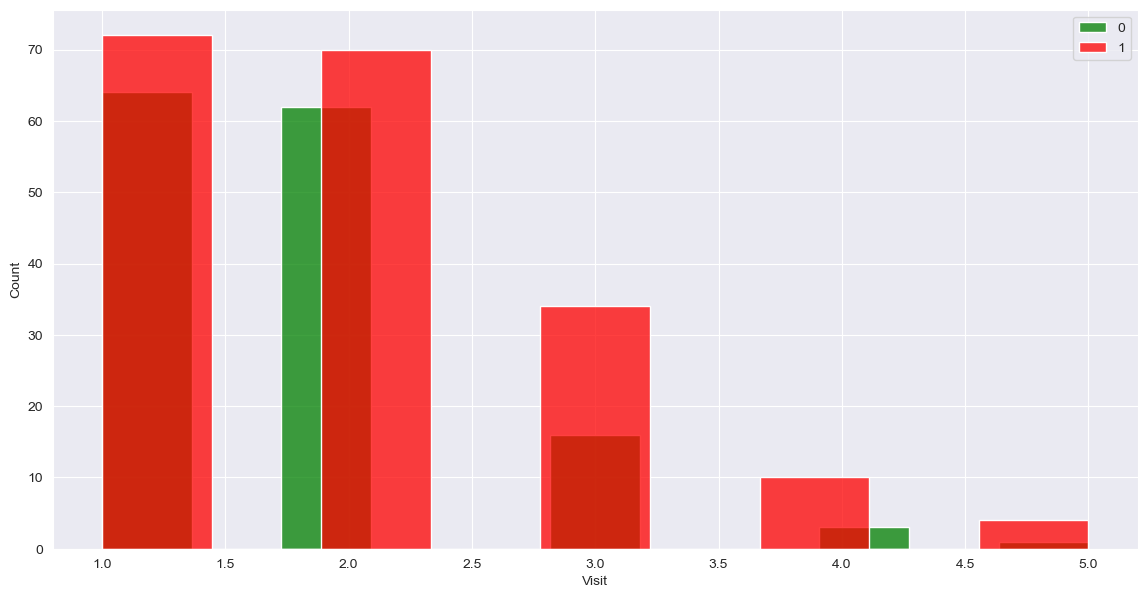

In [17]:
plt.figure(figsize=(14,7))
data_test_0=Pre_Cleaned.loc[Pre_Cleaned.Group == 0]['Visit']
data_test_1=Pre_Cleaned.loc[Pre_Cleaned.Group == 1]['Visit']
sns.histplot(data_test_0.dropna(),color='g')
sns.histplot(data_test_1.dropna(),color='r')
plt.legend(['0','1'])

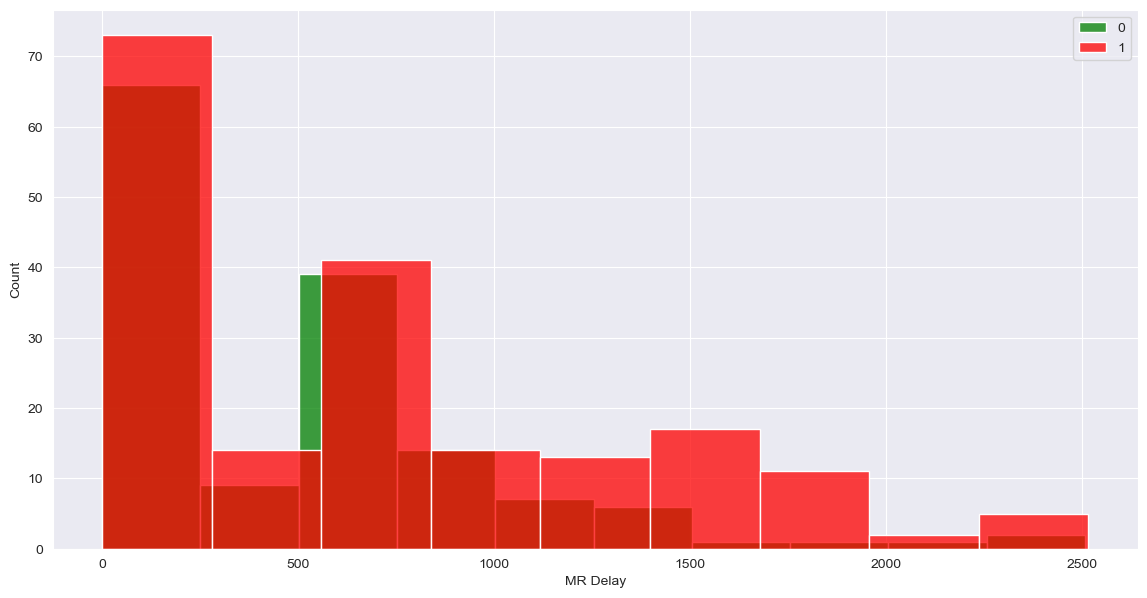

In [18]:
plt.figure(figsize=(14,7))
data_test_0=Pre_Cleaned.loc[Pre_Cleaned.Group == 0]['MR Delay']
data_test_1=Pre_Cleaned.loc[Pre_Cleaned.Group == 1]['MR Delay']
sns.histplot(data_test_0.dropna(),color='g')
sns.histplot(data_test_1.dropna(),color='r')
plt.legend(['0','1'])

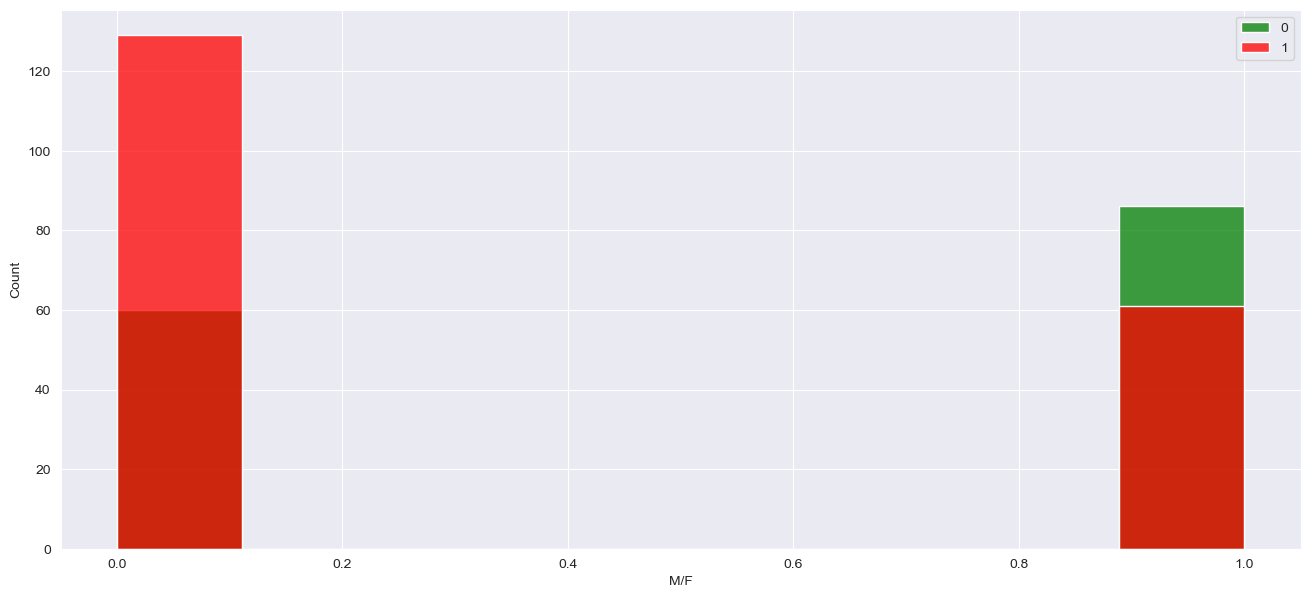

In [19]:
plt.figure(figsize=(16,7))
data_test_0=Pre_Cleaned.loc[Pre_Cleaned.Group == 0]['M/F']
data_test_1=Pre_Cleaned.loc[Pre_Cleaned.Group == 1]['M/F']
sns.histplot(data_test_0.dropna(),color='g')
sns.histplot(data_test_1.dropna(),color='r')
plt.legend(['0','1'])

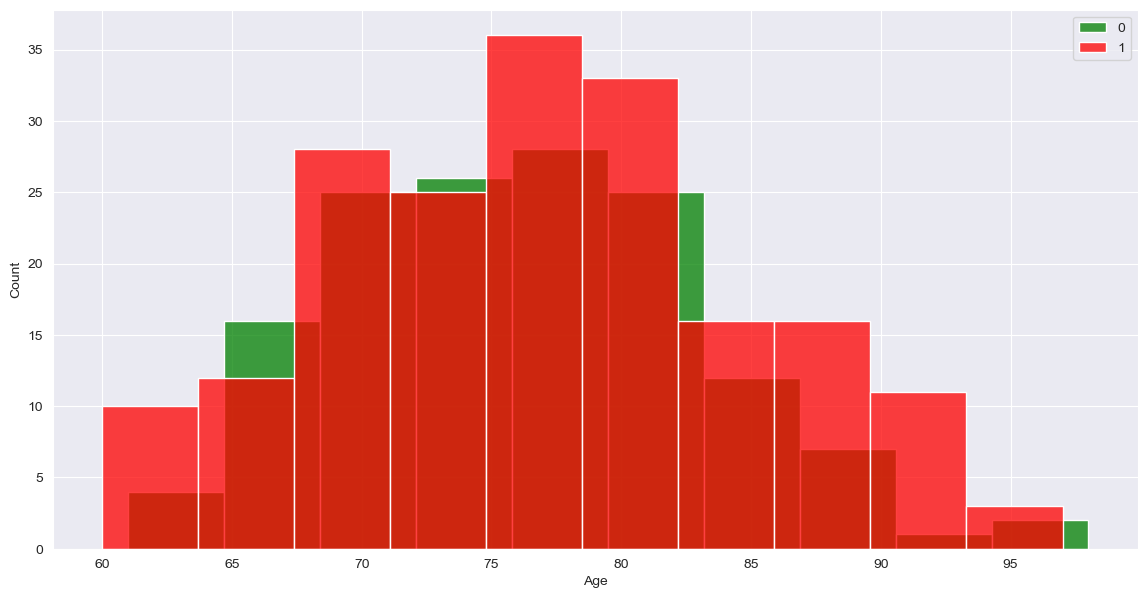

In [20]:
plt.figure(figsize=(14,7))
data_test_0=Pre_Cleaned.loc[Pre_Cleaned.Group == 0]['Age']
data_test_1=Pre_Cleaned.loc[Pre_Cleaned.Group == 1]['Age']
sns.histplot(data_test_0.dropna(),color='g')
sns.histplot(data_test_1.dropna(),color='r')
plt.legend(['0','1'])

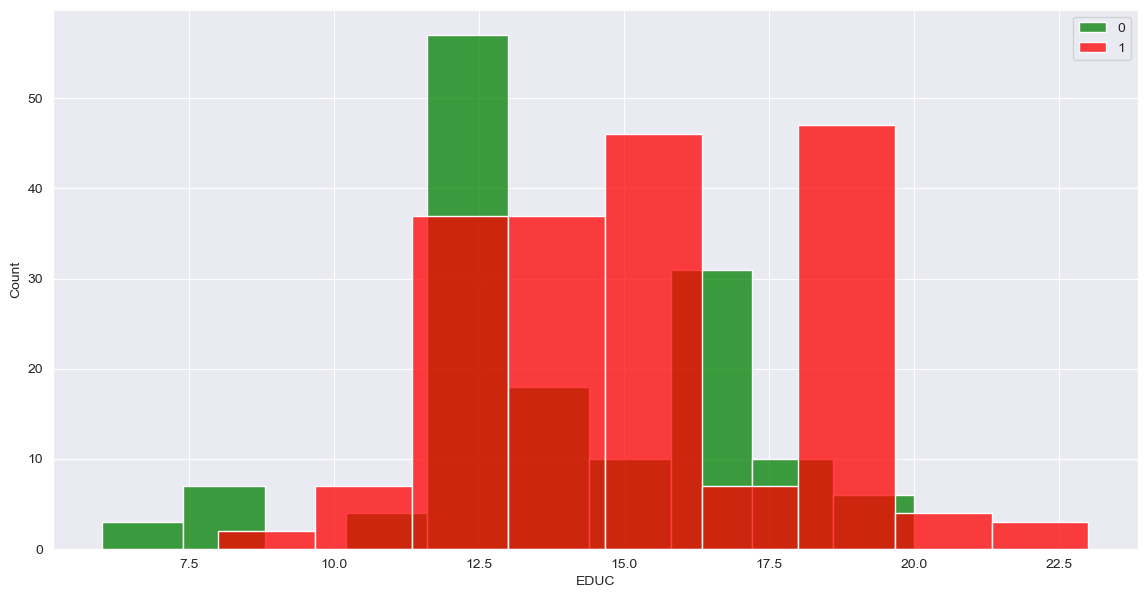

In [21]:
plt.figure(figsize=(14,7))
data_test_0=Pre_Cleaned.loc[Pre_Cleaned.Group == 0]['EDUC']
data_test_1=Pre_Cleaned.loc[Pre_Cleaned.Group == 1]['EDUC']
sns.histplot(data_test_0.dropna(),color='g')
sns.histplot(data_test_1.dropna(),color='r')
plt.legend(['0','1'])

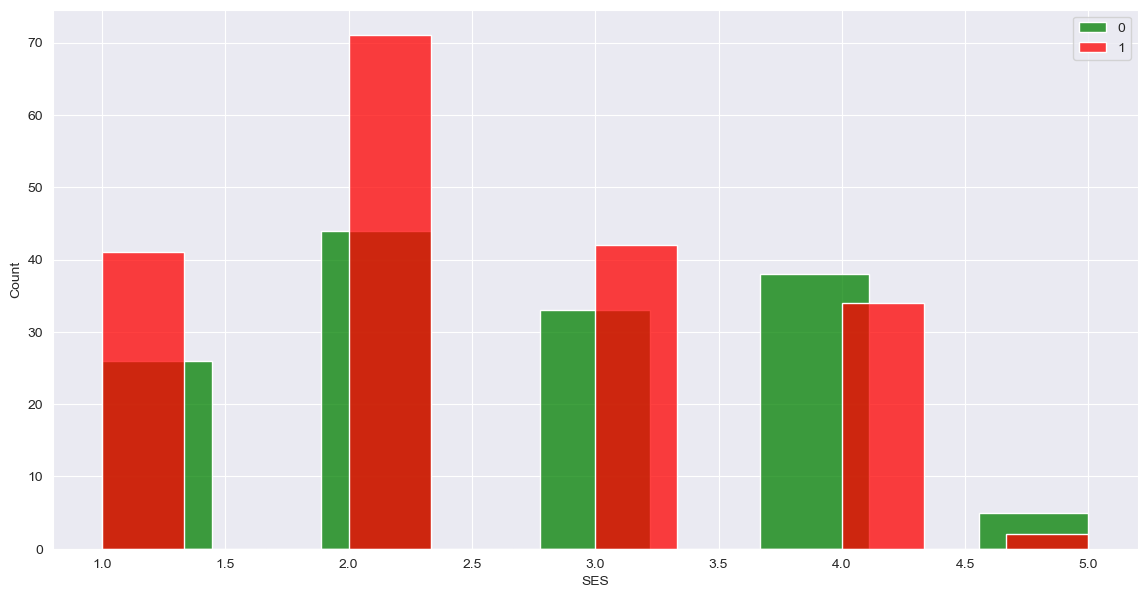

In [22]:
plt.figure(figsize=(14,7))
data_test_0=Pre_Cleaned.loc[Pre_Cleaned.Group == 0]['SES']
data_test_1=Pre_Cleaned.loc[Pre_Cleaned.Group == 1]['SES']
sns.histplot(data_test_0.dropna(),color='g')
sns.histplot(data_test_1.dropna(),color='r')
plt.legend(['0','1'])

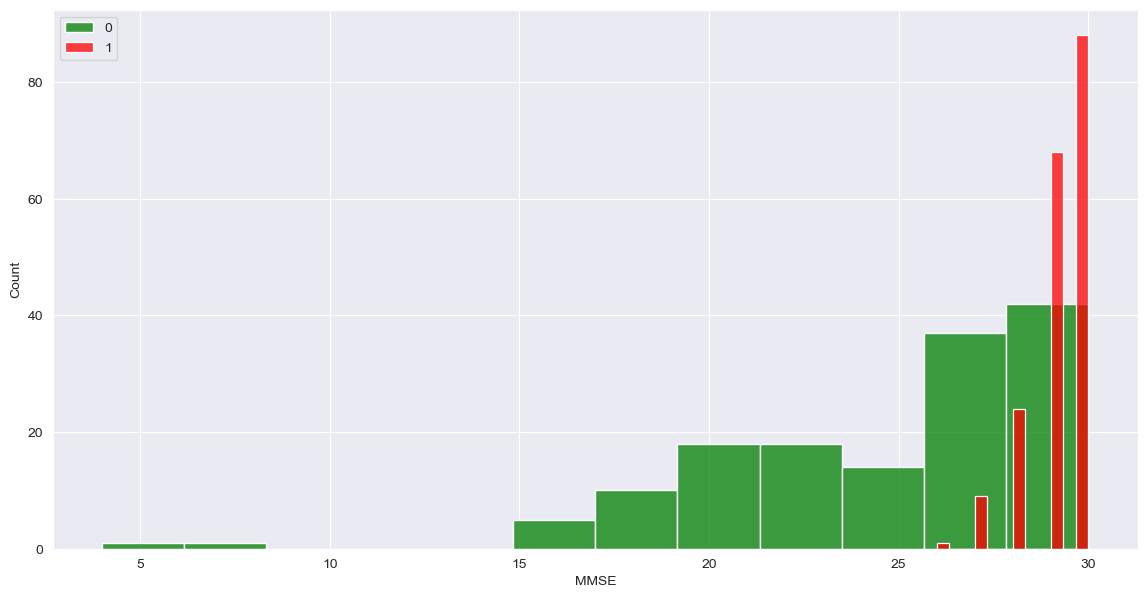

In [23]:
plt.figure(figsize=(14,7))
data_test_0=Pre_Cleaned.loc[Pre_Cleaned.Group == 0]['MMSE']
data_test_1=Pre_Cleaned.loc[Pre_Cleaned.Group == 1]['MMSE']
sns.histplot(data_test_0.dropna(),color='g')
sns.histplot(data_test_1.dropna(),color='r')
plt.legend(['0','1'])

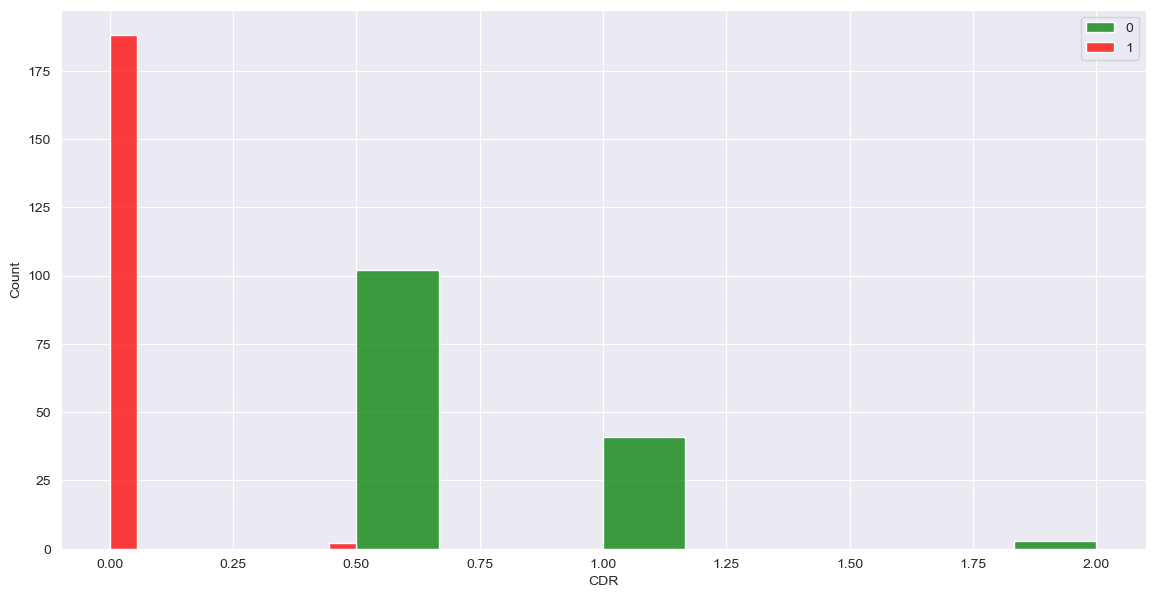

In [24]:
plt.figure(figsize=(14,7))
data_test_0=Pre_Cleaned.loc[Pre_Cleaned.Group == 0]['CDR']
data_test_1=Pre_Cleaned.loc[Pre_Cleaned.Group == 1]['CDR']
sns.histplot(data_test_0.dropna(),color='g')
sns.histplot(data_test_1.dropna(),color='r')
plt.legend(['0','1'])

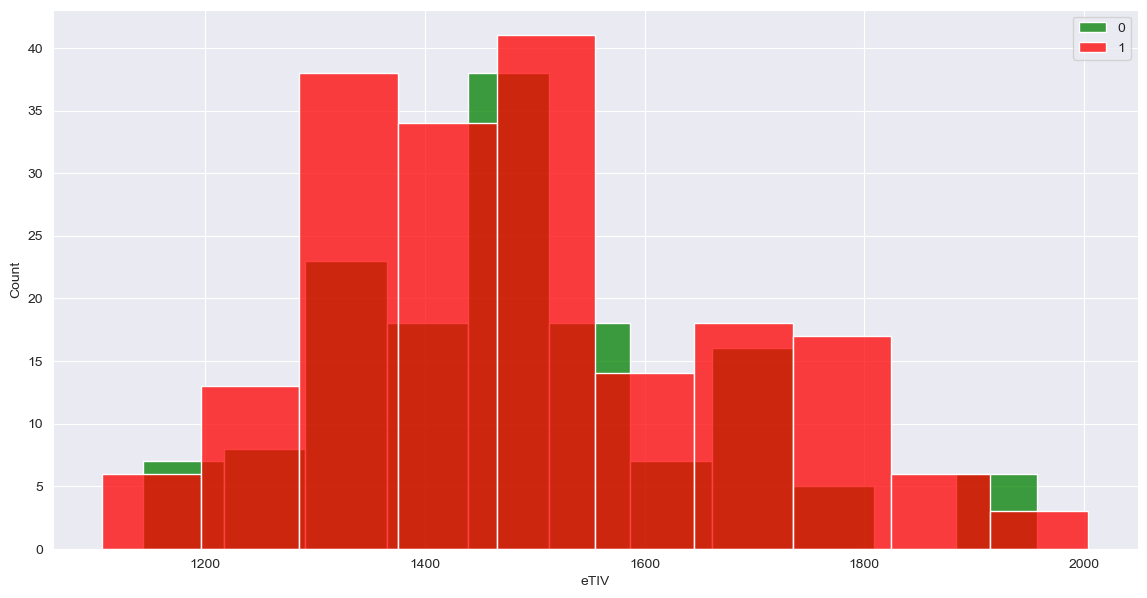

In [25]:
plt.figure(figsize=(14,7))
data_test_0=Pre_Cleaned.loc[Pre_Cleaned.Group == 0]['eTIV']
data_test_1=Pre_Cleaned.loc[Pre_Cleaned.Group == 1]['eTIV']
sns.histplot(data_test_0.dropna(),color='g')
sns.histplot(data_test_1.dropna(),color='r')
plt.legend(['0','1'])

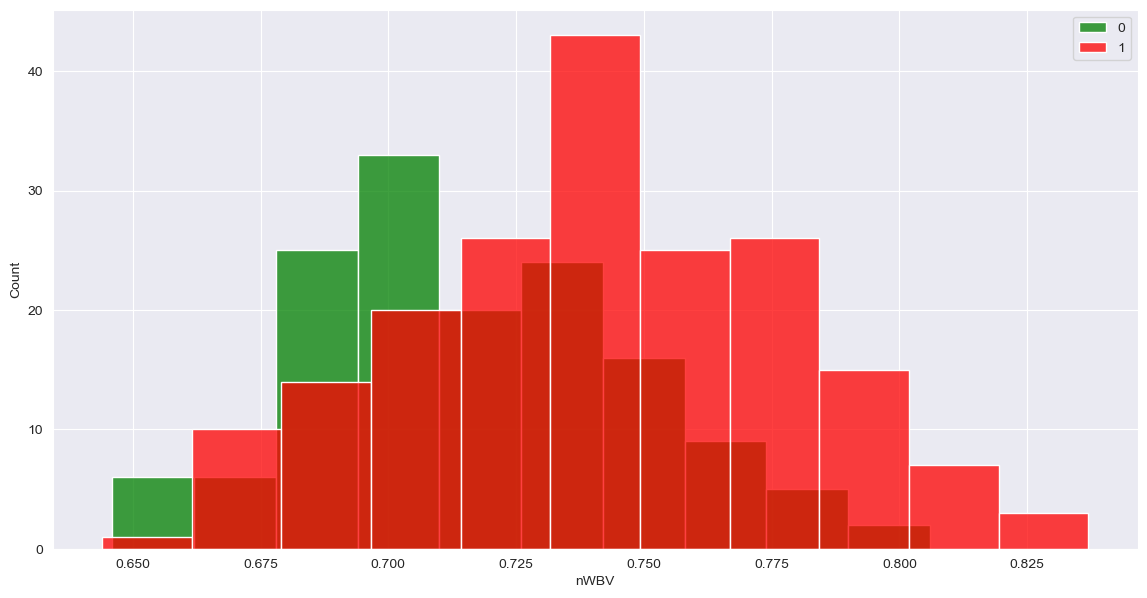

In [26]:
plt.figure(figsize=(14,7))
data_test_0=Pre_Cleaned.loc[Pre_Cleaned.Group == 0]['nWBV']
data_test_1=Pre_Cleaned.loc[Pre_Cleaned.Group == 1]['nWBV']
sns.histplot(data_test_0.dropna(),color='g')
sns.histplot(data_test_1.dropna(),color='r')
plt.legend(['0','1'])

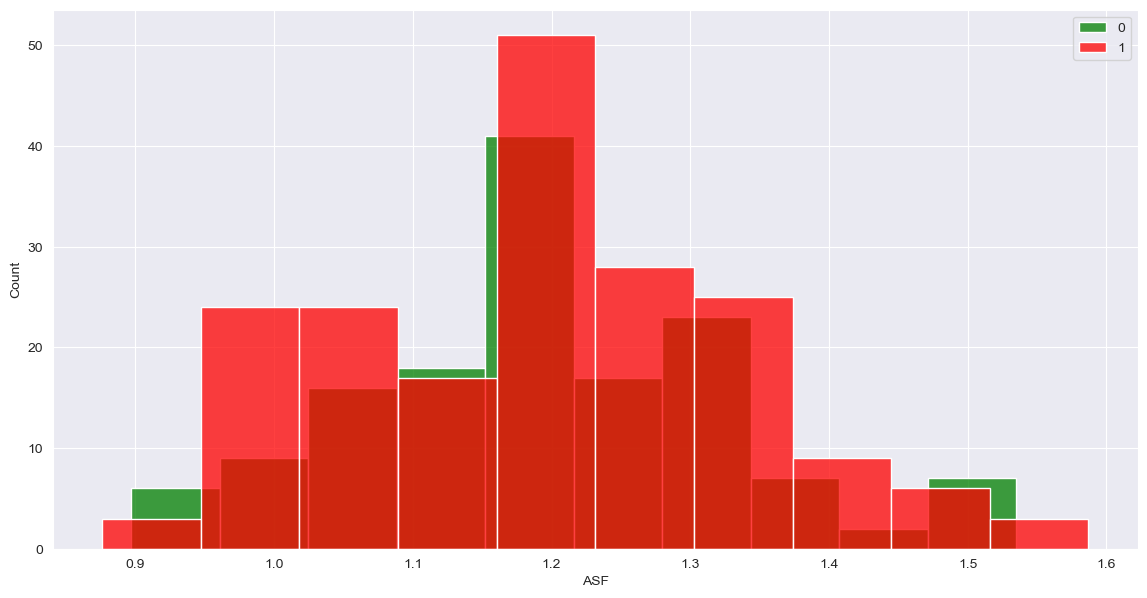

In [27]:
plt.figure(figsize=(14,7))
data_test_0=Pre_Cleaned.loc[Pre_Cleaned.Group == 0]['ASF']
data_test_1=Pre_Cleaned.loc[Pre_Cleaned.Group == 1]['ASF']
sns.histplot(data_test_0.dropna(),color='g')
sns.histplot(data_test_1.dropna(),color='r')
plt.legend(['0','1'])

In [28]:
Pre_Cleaned

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,1,1,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,1,2,457,1,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,0,1,0,1,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,0,2,560,1,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,0,3,1895,1,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,0,2,842,1,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,0,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,1,1,0,0,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,1,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323


# Samping into testing and training dataset

In [29]:
Pre_Cleaned_1 = Pre_Cleaned.drop('Subject ID', axis = 1)
dataset_Cleaned = Pre_Cleaned_1.drop('MRI ID', axis = 1)
X = dataset_Cleaned.drop('Group', axis = 1)
y = dataset_Cleaned['Group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [30]:
X_train

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
292,1,0,0,89,18,2.0,30.0,0.0,1715,0.746,1.023
159,4,2288,0,76,14,3.0,29.0,0.0,1490,0.774,1.178
167,2,1393,1,73,16,2.0,29.0,0.0,1931,0.722,0.909
199,2,673,1,72,18,1.0,29.0,0.0,1785,0.687,0.983
145,1,0,0,88,12,3.0,30.0,0.0,1428,0.700,1.229
...,...,...,...,...,...,...,...,...,...,...,...
275,1,0,0,70,11,4.0,29.0,0.5,1295,0.748,1.355
371,2,763,0,63,13,2.0,30.0,0.0,1327,0.796,1.323
43,1,0,0,86,12,4.0,21.0,0.5,1247,0.662,1.407
46,2,673,1,84,12,3.0,27.0,0.5,1445,0.695,1.214


In [31]:
y_train

292    1
159    1
167    1
199    1
145    1
      ..
275    0
371    1
43     0
46     0
151    1
Name: Group, Length: 268, dtype: int32

In [32]:
X_test

,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
362,2,182,0,66,13,2.0,30.0,0.0,1506,0.740,1.165
229,1,0,1,81,11,4.0,28.0,0.0,1750,0.670,1.003
54,2,1099,0,80,12,4.0,30.0,0.0,1390,0.735,1.263
369,3,2297,1,86,16,1.0,26.0,0.5,1688,0.675,1.040
256,1,0,1,70,16,3.0,29.0,0.5,1463,0.749,1.200
...,...,...,...,...,...,...,...,...,...,...,...
51,1,0,1,64,18,2.0,22.0,0.5,1547,0.737,1.134
344,2,700,1,72,16,4.0,28.0,0.5,1796,0.732,0.977
134,1,0,0,80,12,2.0,30.0,0.5,1430,0.737,1.228
143,3,1438,1,71,12,4.0,29.0,0.0,1455,0.724,1.206


Text(0.5, 1.0, 'Demented Status_Original Data')

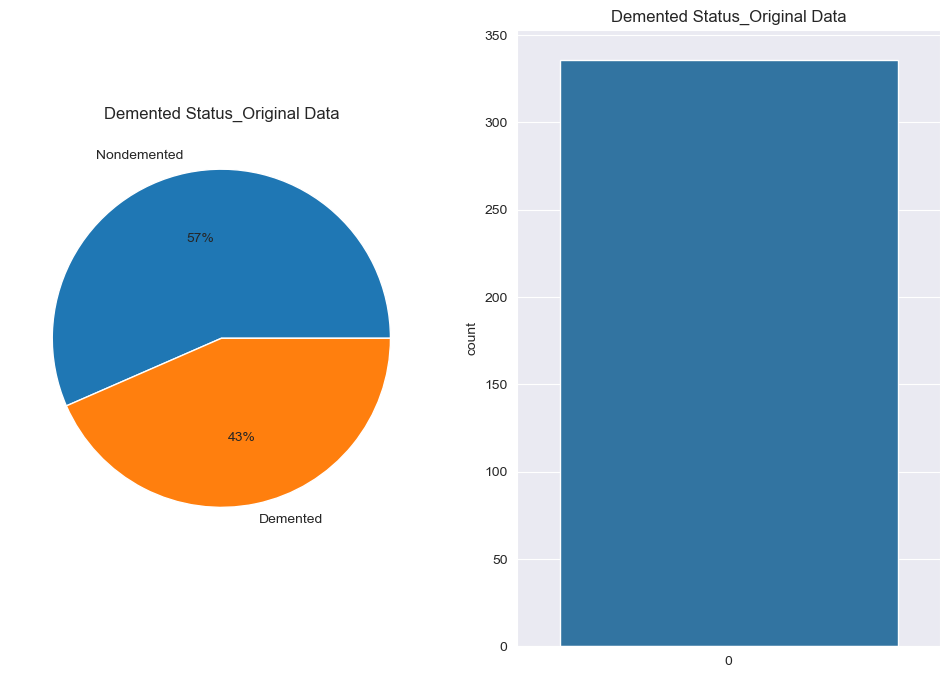

In [33]:
#EDA for orginal dataset, Compare with original dataset
f = plt.figure(figsize=(12 ,8))

ax = f.add_subplot(121)
labels = ['Nondemented', 'Demented']
Default = dataset_Cleaned.Group.value_counts()
ax.pie(Default, labels=labels, autopct='%.0f%%')
ax.set_title('Demented Status_Original Data')

ax = f.add_subplot(122)
sns.countplot(dataset_Cleaned.Group)
ax.set_title('Demented Status_Original Data')

In [34]:
y_test

362    1
229    1
54     1
369    0
256    0
      ..
51     0
344    0
134    0
143    1
39     0
Name: Group, Length: 68, dtype: int32

KeyError: 0

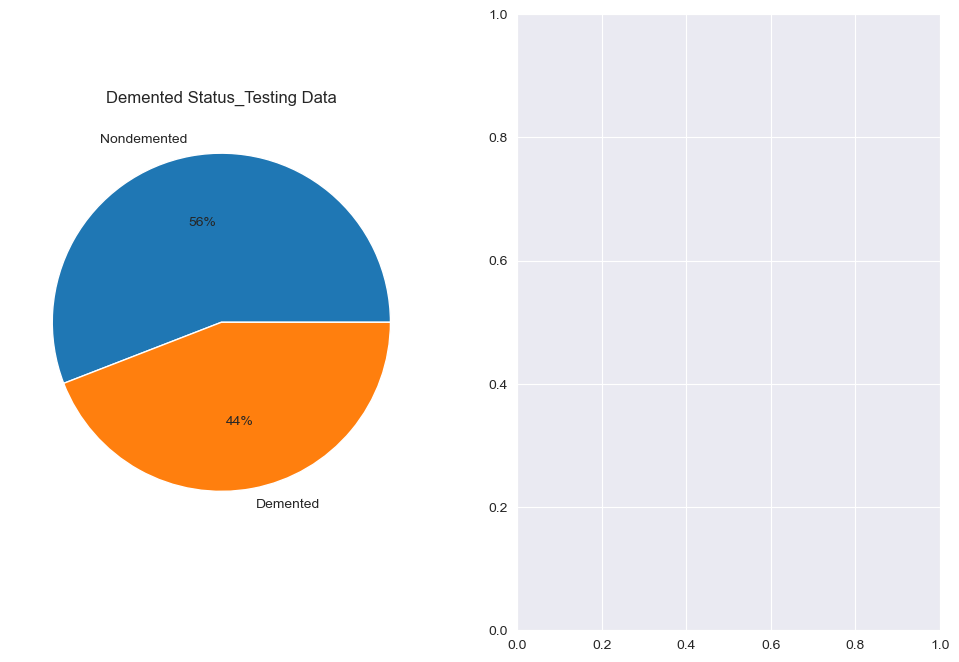

In [35]:
#EDA for orginal dataset, Compare with original dataset
f = plt.figure(figsize=(12 ,8))

ax = f.add_subplot(121)
labels = ['Nondemented', 'Demented']
Default = y_test.value_counts()
ax.pie(Default, labels=labels, autopct='%.0f%%')
ax.set_title('Demented Status_Testing Data')

ax = f.add_subplot(122)
sns.countplot(y_test)
ax.set_title('Demented Status_Testing Data')

KeyError: 0

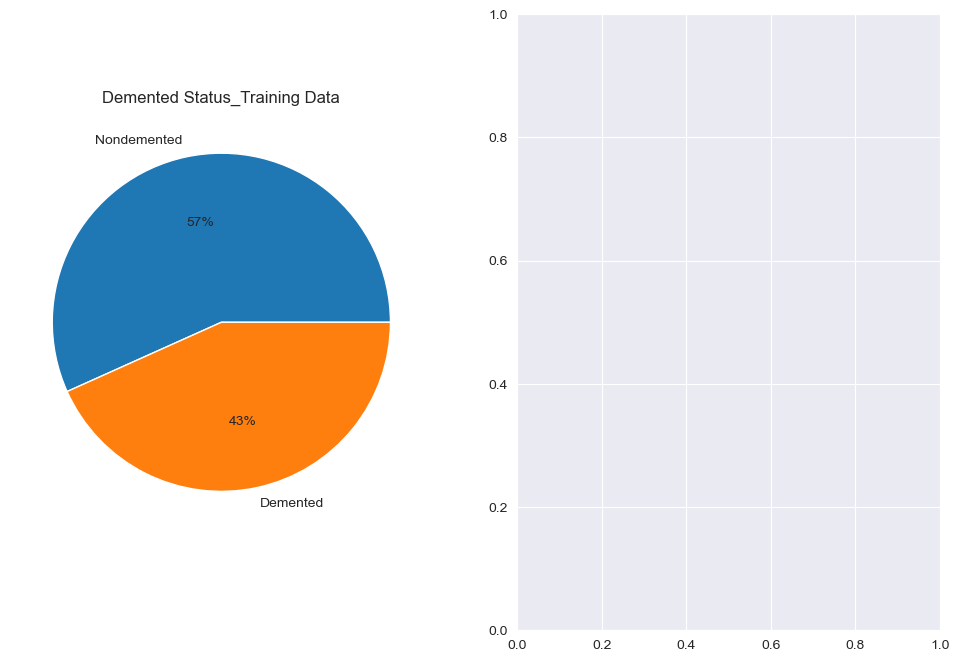

In [36]:
#EDA for orginal dataset, Compare with original dataset
f = plt.figure(figsize=(12 ,8))

ax = f.add_subplot(121)
labels = ['Nondemented', 'Demented']
Default = y_train.value_counts()
ax.pie(Default, labels=labels, autopct='%.0f%%')
ax.set_title('Demented Status_Training Data')

ax = f.add_subplot(122)
sns.countplot(y_test)
ax.set_title('Demented Status_Training Data')

In [37]:
#gradient Boosting Decision Tree model
gradient_model = GradientBoostingClassifier()
gradient_model.fit(X_train,y_train)
print(gradient_model.score(X_train,y_train),gradient_model.score(X_test,y_test))

1.0 1.0


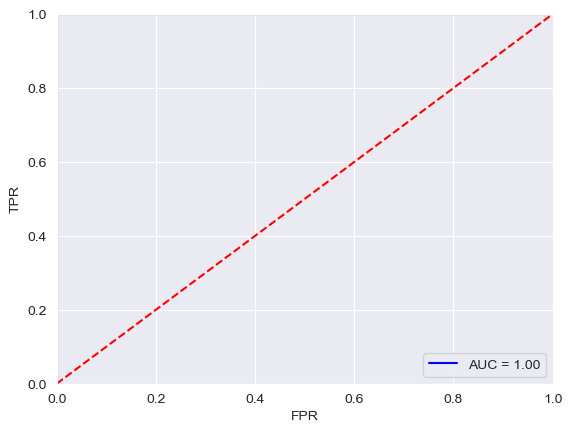

auc:1.0       ks:1.0


In [38]:
y_pred= gradient_model.predict(X_train)  
train_predprob = gradient_model.predict_proba(X_train)[:,1]
test_predprob = gradient_model.predict_proba(X_test)[:,1]
FPR,TPR,threshold =roc_curve(y_test,test_predprob)
ROC_AUC= auc(FPR,TPR)
plt.plot(FPR, TPR, 'b', label='AUC = %0.2f' % ROC_AUC)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()
ks=max(TPR-FPR).round(2)
print("auc:{}       ks:{}".format(ROC_AUC.round(2),ks))

In [39]:
#Decision Tree model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train,y_train)
print(decision_tree_model.score(X_train,y_train),decision_tree_model.score(X_test,y_test))

1.0 1.0


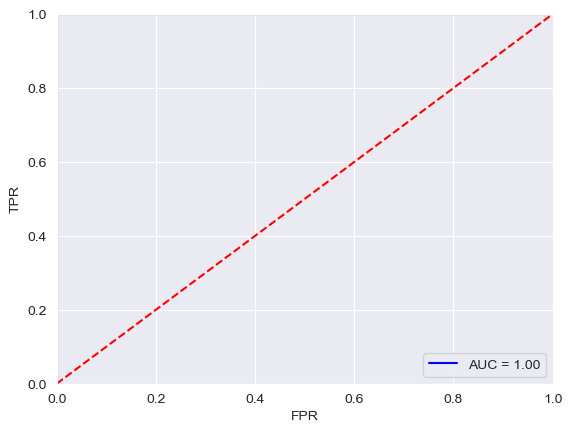

auc:1.0       ks:1.0


In [40]:
y_pred= decision_tree_model.predict(X_train)  
train_predprob = decision_tree_model.predict_proba(X_train)[:,1]
test_predprob = decision_tree_model.predict_proba(X_test)[:,1]
FPR,TPR,threshold =roc_curve(y_test,test_predprob)
ROC_AUC= auc(FPR,TPR)
plt.plot(FPR, TPR, 'b', label='AUC = %0.2f' % ROC_AUC)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()
ks=max(TPR-FPR).round(2)
print("auc:{}       ks:{}".format(ROC_AUC.round(2),ks))

In [52]:
#Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train,y_train)
print(random_forest_model.score(X_train,y_train),random_forest_model.score(X_test,y_test))

1.0 1.0


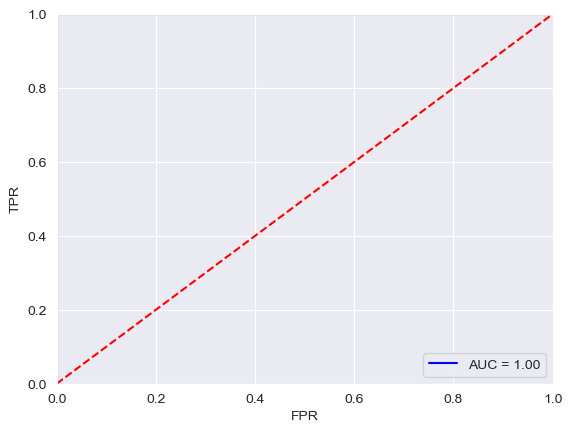

auc:1.0       ks:1.0


In [53]:
y_pred= random_forest_model.predict(X_train)
#y_pred= random_forest_model.predict(X_test)
train_predprob = random_forest_model.predict_proba(X_train)[:,1]
test_predprob = random_forest_model.predict_proba(X_test)[:,1]
FPR,TPR,threshold =roc_curve(y_test,test_predprob)
ROC_AUC= auc(FPR,TPR)
plt.plot(FPR, TPR, 'b', label='AUC = %0.2f' % ROC_AUC)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()
ks=max(TPR-FPR).round(2)
print("auc:{}       ks:{}".format(ROC_AUC.round(2),ks))

In [43]:
#Conclusion: Based on the perfomance of different models, we should choose Random Forest model

In [44]:
# Testing for individual inputs for random forest model
#test_input = np.array([2,182,0,66,13,2.0,30.0,0.0,1506,0.740,1.165])
#test_input = np.array([4,2288,0,76,14,3.0,29.0,0.0,1490,0.774,1.178])
#print(test_input)
#y_pred= random_forest_model.predict(test_input.reshape(1, -1))
y_pred= random_forest_model.predict(X_test) 
print(y_pred)

[1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 0
 1 0 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0]


In [45]:
y_pred.size

68

In [46]:
y_test.size

68

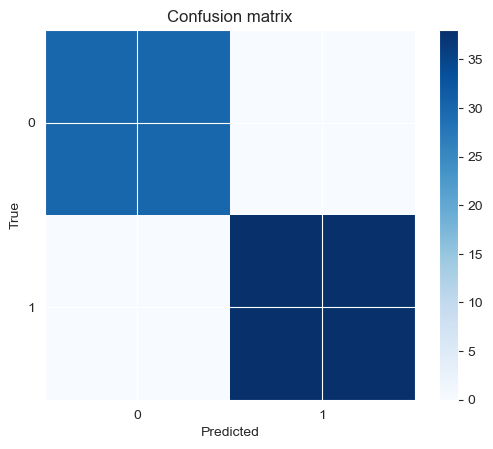

In [49]:
# displaying confusion matrix
from sklearn.metrics import confusion_matrix
# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y_test))) # number of classes
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [50]:
# using crosstab to check the precision
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,30,0,30
1,0,38,38
All,30,38,68


In [54]:
# Generating pickle file for the ML model
with open('trained_model-2.0.0.pkl','wb') as f:
    pickle.dump(random_forest_model, f)